# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import g_key
import json
from pprint import pprint
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | maragogi
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | saint-joseph
Processing Record 5 of Set 1 | bilma
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | nurota
Processing Record 9 of Set 1 | nsoko
Processing Record 10 of Set 1 | pangnirtung
Processing Record 11 of Set 1 | noumea
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | vaini
City not found. Skipping.

Processing Record 43 of Set 4 | devonport
Processing Record 44 of Set 4 | cortez
City not found. Skipping...
Processing Record 45 of Set 4 | gweta
City not found. Skipping...
Processing Record 46 of Set 4 | sao filipe
Processing Record 47 of Set 4 | karratha
Processing Record 48 of Set 4 | akureyri
Processing Record 49 of Set 4 | quelimane
Processing Record 1 of Set 5 | chumikan
Processing Record 2 of Set 5 | vardo
City not found. Skipping...
Processing Record 3 of Set 5 | maumere
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | hokitika
Processing Record 6 of Set 5 | shimoda
Processing Record 7 of Set 5 | gigmoto
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | dawlatabad
Processing Record 10 of Set 5 | kahului
Processing Record 11 of Set 5 | taoudenni
Processing Record 12 of Set 5 | airai
Processing Record 13 of Set 5 | constitucion
Processing Record 14 of Set 5 | kenora
Processing Record 15 of Set 5 | katherine
Processing Record 16 of Set 5 

Processing Record 34 of Set 8 | kongolo
City not found. Skipping...
Processing Record 35 of Set 8 | innisfail
Processing Record 36 of Set 8 | longyearbyen
Processing Record 37 of Set 8 | peski
Processing Record 38 of Set 8 | moose factory
Processing Record 39 of Set 8 | biak
Processing Record 40 of Set 8 | nynashamn
City not found. Skipping...
Processing Record 41 of Set 8 | simbahan
Processing Record 42 of Set 8 | lompoc
Processing Record 43 of Set 8 | harper
Processing Record 44 of Set 8 | baley
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | xichang
Processing Record 47 of Set 8 | roald
Processing Record 48 of Set 8 | kysyl-syr
Processing Record 49 of Set 8 | kajaani
Processing Record 1 of Set 9 | margate
Processing Record 2 of Set 9 | lethem
Processing Record 3 of Set 9 | bayevo
Processing Record 4 of Set 9 | aksarka
Processing Record 5 of Set 9 | riyadh
Processing Record 6 of Set 9 | grand river south east
Processing Record 7 of Set 9 | atasu
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}


In [5]:
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.to_csv("Output_Data/weather_Output")
weather_dataframe.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,1,PH,1586610785,74,8.99,125.34,77.68,3.98
1,maragogi,60,BR,1586611260,66,-9.01,-35.22,85.05,7.70
2,ribeira grande,75,ES,1586610796,76,42.75,-8.44,61.00,4.70
3,saint-joseph,40,RE,1586611260,65,-21.37,55.62,80.60,26.40
4,bilma,90,NE,1586611260,9,18.69,12.92,96.19,12.46


In [6]:
weather_dataframe.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

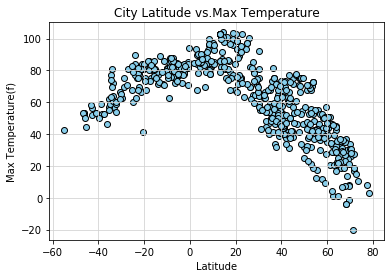

In [7]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], edgecolors="black",facecolors="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs.Max Temperature")
plt.ylabel("Max Temperature(f)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Images/TemperatureVsLatitude_Fig_1")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

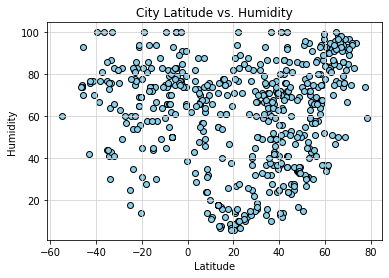

In [8]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], edgecolors="black",facecolors="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Images/HumidityVsLatitude_Fig_2")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

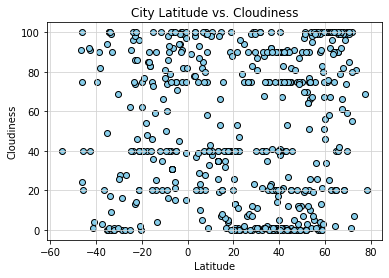

In [9]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], edgecolors="black",facecolors="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Images/CloudinessVsLatitude_Fig_3")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

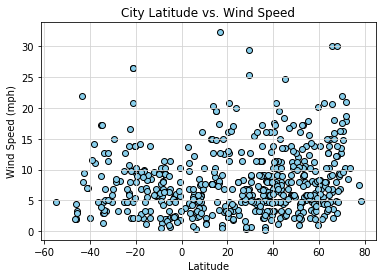

In [10]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], edgecolors="black",facecolors="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Images/WindSpeedVsLatitude_Fig_4")

# Show plot
plt.show()

# Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearReg(x,y,title):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress=x*slope+intercept
    msg=f'Y = {round(slope,2)}X + {round(intercept,2)}'
    plt.scatter(x,y,linewidths=1,edgecolor='black',label='Cities',alpha=1)
    plt.plot(x,regress,'r')
    plt.annotate(msg,(x.min(),y.min()),fontsize=15,color='red')
    plt.title(f'Latitute Vs {title}')
    plt.ylabel(f'{title}')
    plt.xlabel('Latitide')
    plt.savefig(f'Images/Lat_vs_{title}_with_liner_regression.png')
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

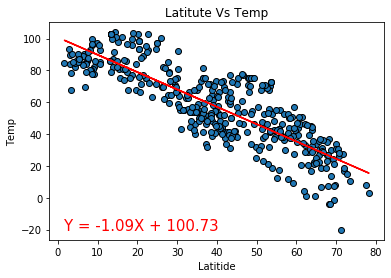

In [13]:
# Perform a linear regression on temperature vs. latitude
linearReg(northern_df["Lat"],northern_df['Max Temp'],'Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

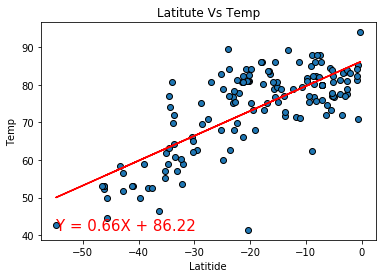

In [14]:
# Perform a linear regression on temperature vs. latitude
linearReg(southern_df["Lat"],southern_df['Max Temp'],'Temp')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

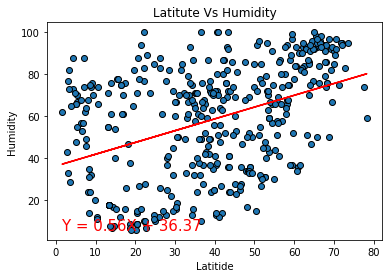

In [15]:
# Perform a linear regression on Humidity (%) vs. latitude
linearReg(northern_df["Lat"],northern_df['Humidity'],'Humidity')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

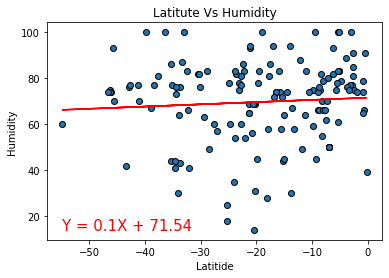

In [16]:
# Perform a linear regression on Humidity (%) vs. latitude
linearReg(southern_df["Lat"],southern_df['Humidity'],'Humidity')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Perform a linear regression on Cloudiness vs. latitude
linearReg(northern_df["Lat"],northern_df['Cloudiness'],'Cloudiness')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Perform a linear regression on Cloudiness vs. latitude
linearReg(southern_df["Lat"],southern_df['Cloudiness'],'Cloudiness')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Perform a linear regression on Wind Speed(mph) vs. latitude
linearReg(northern_df["Lat"],northern_df['Wind Speed'],'Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Perform a linear regression on Wind Speed(mph) vs. latitude
linearReg(southern_df["Lat"],southern_df['Wind Speed'],'Wind Speed')


# Observations:

1.It seems that there is no correlation between humidity and latitude

2.Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic

3.As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases